In [ ]:
### done

In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
from tensorflow_core.python.keras.wrappers.scikit_learn import KerasClassifier
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
data= pd.read_csv('../min_max_norm.csv')

### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### Neural Network

In [5]:
## ANN Model
def create_model(optimizer):
    model = Sequential()
	#Layer 1
    model.add(Dense(20, activation='relu', input_dim=20))
    model.add(Dropout(0.3))
    #Layer 2
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    
    # output layer
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN = KerasClassifier(build_fn=create_model)
params={'optimizer' : ['adam', 'rmsprop'],
        'batch_size': [128, 256, 512, 800]}

In [7]:
##accuracy
grid_search_acc= GridSearchCV(estimator=ANN, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_acc.best_estimator_.predict(X_test)

Train on 71786 samples, validate on 30766 samples
Epoch 1/300
71786/71786 [==============================] - 3s 41us/sample - loss: 0.5898 - accuracy: 0.6839 - val_loss: 0.4113 - val_accuracy: 0.8223
Epoch 2/300
71786/71786 [==============================] - 2s 33us/sample - loss: 0.4248 - accuracy: 0.8100 - val_loss: 0.3714 - val_accuracy: 0.8313
Epoch 3/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3936 - accuracy: 0.8248 - val_loss: 0.3657 - val_accuracy: 0.8315
Epoch 4/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3831 - accuracy: 0.8287 - val_loss: 0.3637 - val_accuracy: 0.8316
Epoch 5/300
71786/71786 [==============================] - 2s 28us/sample - loss: 0.3802 - accuracy: 0.8304 - val_loss: 0.3616 - val_accuracy: 0.8316
Epoch 6/300
71786/71786 [==============================] - 2s 30us/sample - loss: 0.3752 - accuracy: 0.8325 - val_loss: 0.3613 - val_accuracy: 0.8314
Epoch 7/300
71786/71786 [=========================

Epoch 55/300
71786/71786 [==============================] - 2s 30us/sample - loss: 0.3604 - accuracy: 0.8353 - val_loss: 0.3583 - val_accuracy: 0.8324
Epoch 56/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3609 - accuracy: 0.8351 - val_loss: 0.3580 - val_accuracy: 0.8330
Epoch 57/300
71786/71786 [==============================] - 3s 36us/sample - loss: 0.3606 - accuracy: 0.8347 - val_loss: 0.3586 - val_accuracy: 0.8327
Epoch 58/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3611 - accuracy: 0.8351 - val_loss: 0.3579 - val_accuracy: 0.8329
Epoch 59/300
71786/71786 [==============================] - 3s 35us/sample - loss: 0.3605 - accuracy: 0.8353 - val_loss: 0.3582 - val_accuracy: 0.8328
Epoch 60/300
71786/71786 [==============================] - 2s 33us/sample - loss: 0.3601 - accuracy: 0.8358 - val_loss: 0.3582 - val_accuracy: 0.8340
Epoch 61/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3602 - ac

71786/71786 [==============================] - 2s 31us/sample - loss: 0.3579 - accuracy: 0.8363 - val_loss: 0.3572 - val_accuracy: 0.8335
Epoch 110/300
71786/71786 [==============================] - 2s 34us/sample - loss: 0.3588 - accuracy: 0.8358 - val_loss: 0.3576 - val_accuracy: 0.8328
Epoch 111/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3595 - accuracy: 0.8358 - val_loss: 0.3576 - val_accuracy: 0.8330
Epoch 112/300
71786/71786 [==============================] - 2s 28us/sample - loss: 0.3596 - accuracy: 0.8362 - val_loss: 0.3574 - val_accuracy: 0.8337
Epoch 113/300
71786/71786 [==============================] - 2s 34us/sample - loss: 0.3594 - accuracy: 0.8362 - val_loss: 0.3573 - val_accuracy: 0.8339
Epoch 114/300
71786/71786 [==============================] - 2s 26us/sample - loss: 0.3599 - accuracy: 0.8359 - val_loss: 0.3571 - val_accuracy: 0.8335
Epoch 115/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3587 - accuracy:

Epoch 163/300
71786/71786 [==============================] - 2s 28us/sample - loss: 0.3581 - accuracy: 0.8359 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 164/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3587 - accuracy: 0.8362 - val_loss: 0.3561 - val_accuracy: 0.8335
Epoch 165/300
71786/71786 [==============================] - 2s 34us/sample - loss: 0.3575 - accuracy: 0.8363 - val_loss: 0.3562 - val_accuracy: 0.8331
Epoch 166/300
71786/71786 [==============================] - 2s 30us/sample - loss: 0.3587 - accuracy: 0.8357 - val_loss: 0.3559 - val_accuracy: 0.8336
Epoch 167/300
71786/71786 [==============================] - 2s 27us/sample - loss: 0.3573 - accuracy: 0.8370 - val_loss: 0.3558 - val_accuracy: 0.8333
Epoch 168/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3584 - accuracy: 0.8360 - val_loss: 0.3561 - val_accuracy: 0.8334
Epoch 169/300
71786/71786 [==============================] - 2s 33us/sample - loss: 0.35

Epoch 217/300
71786/71786 [==============================] - 3s 35us/sample - loss: 0.3570 - accuracy: 0.8364 - val_loss: 0.3543 - val_accuracy: 0.8334
Epoch 218/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3576 - accuracy: 0.8365 - val_loss: 0.3535 - val_accuracy: 0.8332
Epoch 219/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3575 - accuracy: 0.8358 - val_loss: 0.3535 - val_accuracy: 0.8338
Epoch 220/300
71786/71786 [==============================] - 2s 28us/sample - loss: 0.3579 - accuracy: 0.8353 - val_loss: 0.3538 - val_accuracy: 0.8342
Epoch 221/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3579 - accuracy: 0.8348 - val_loss: 0.3532 - val_accuracy: 0.8344
Epoch 222/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3581 - accuracy: 0.8355 - val_loss: 0.3531 - val_accuracy: 0.8340
Epoch 223/300
71786/71786 [==============================] - 2s 34us/sample - loss: 0.35

Epoch 271/300
71786/71786 [==============================] - 2s 26us/sample - loss: 0.3570 - accuracy: 0.8365 - val_loss: 0.3528 - val_accuracy: 0.8337
Epoch 272/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3571 - accuracy: 0.8363 - val_loss: 0.3526 - val_accuracy: 0.8348
Epoch 273/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3577 - accuracy: 0.8359 - val_loss: 0.3524 - val_accuracy: 0.8344
Epoch 274/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.3563 - accuracy: 0.8366 - val_loss: 0.3528 - val_accuracy: 0.8341
Epoch 275/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3581 - accuracy: 0.8358 - val_loss: 0.3526 - val_accuracy: 0.8338
Epoch 276/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3564 - accuracy: 0.8375 - val_loss: 0.3522 - val_accuracy: 0.8348
Epoch 277/300
71786/71786 [==============================] - 2s 26us/sample - loss: 0.35

In [8]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'batch_size': 256, 'optimizer': 'adam'}
----------
[[11084  4275]
 [  836 14571]]
----------
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     15359
           1       0.77      0.95      0.85     15407

    accuracy                           0.83     30766
   macro avg       0.85      0.83      0.83     30766
weighted avg       0.85      0.83      0.83     30766

----------


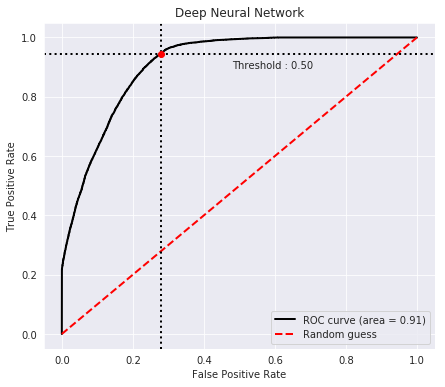

In [9]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Deep Neural Network')
plt.show()

In [10]:
early_stop_rec = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec = KerasClassifier(build_fn=create_model)

In [11]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=ANN_rec, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_rec])
y_predict= grid_search_rec.best_estimator_.predict(X_test)

Train on 71786 samples, validate on 30766 samples
Epoch 1/300
71786/71786 [==============================] - 3s 37us/sample - loss: 0.5505 - accuracy: 0.7079 - val_loss: 0.3926 - val_accuracy: 0.8308
Epoch 2/300
71786/71786 [==============================] - 2s 27us/sample - loss: 0.4157 - accuracy: 0.8127 - val_loss: 0.3713 - val_accuracy: 0.8310
Epoch 3/300
71786/71786 [==============================] - 2s 30us/sample - loss: 0.3925 - accuracy: 0.8280 - val_loss: 0.3668 - val_accuracy: 0.8309
Epoch 4/300
71786/71786 [==============================] - 1s 19us/sample - loss: 0.3843 - accuracy: 0.8318 - val_loss: 0.3645 - val_accuracy: 0.8312
Epoch 5/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.3812 - accuracy: 0.8328 - val_loss: 0.3626 - val_accuracy: 0.8319
Epoch 6/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3751 - accuracy: 0.8343 - val_loss: 0.3617 - val_accuracy: 0.8320
Epoch 7/300
71786/71786 [=========================

Epoch 55/300
71786/71786 [==============================] - 1s 20us/sample - loss: 0.3628 - accuracy: 0.8357 - val_loss: 0.3580 - val_accuracy: 0.8335
Epoch 56/300
71786/71786 [==============================] - 1s 21us/sample - loss: 0.3627 - accuracy: 0.8351 - val_loss: 0.3585 - val_accuracy: 0.8327
Epoch 57/300
71786/71786 [==============================] - 1s 21us/sample - loss: 0.3615 - accuracy: 0.8350 - val_loss: 0.3580 - val_accuracy: 0.8331
Epoch 58/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.3618 - accuracy: 0.8352 - val_loss: 0.3579 - val_accuracy: 0.8330
Epoch 59/300
71786/71786 [==============================] - 2s 23us/sample - loss: 0.3625 - accuracy: 0.8342 - val_loss: 0.3578 - val_accuracy: 0.8327
Epoch 60/300
71786/71786 [==============================] - 2s 29us/sample - loss: 0.3620 - accuracy: 0.8355 - val_loss: 0.3578 - val_accuracy: 0.8328
Epoch 61/300
71786/71786 [==============================] - 2s 32us/sample - loss: 0.3623 - ac

71786/71786 [==============================] - 1s 20us/sample - loss: 0.3609 - accuracy: 0.8351 - val_loss: 0.3559 - val_accuracy: 0.8341
Epoch 110/300
71786/71786 [==============================] - 2s 28us/sample - loss: 0.3598 - accuracy: 0.8367 - val_loss: 0.3559 - val_accuracy: 0.8332
Epoch 111/300
71786/71786 [==============================] - 2s 27us/sample - loss: 0.3605 - accuracy: 0.8351 - val_loss: 0.3559 - val_accuracy: 0.8342
Epoch 112/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3604 - accuracy: 0.8357 - val_loss: 0.3559 - val_accuracy: 0.8338
Epoch 113/300
71786/71786 [==============================] - 1s 19us/sample - loss: 0.3606 - accuracy: 0.8359 - val_loss: 0.3561 - val_accuracy: 0.8336
Epoch 114/300
71786/71786 [==============================] - 1s 20us/sample - loss: 0.3602 - accuracy: 0.8360 - val_loss: 0.3559 - val_accuracy: 0.8340
Epoch 115/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3609 - accuracy:

Epoch 163/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3593 - accuracy: 0.8362 - val_loss: 0.3536 - val_accuracy: 0.8345
Epoch 164/300
71786/71786 [==============================] - 1s 20us/sample - loss: 0.3597 - accuracy: 0.8365 - val_loss: 0.3528 - val_accuracy: 0.8342
Epoch 165/300
71786/71786 [==============================] - 1s 20us/sample - loss: 0.3587 - accuracy: 0.8369 - val_loss: 0.3535 - val_accuracy: 0.8336
Epoch 166/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3594 - accuracy: 0.8363 - val_loss: 0.3535 - val_accuracy: 0.8336
Epoch 167/300
71786/71786 [==============================] - 2s 25us/sample - loss: 0.3591 - accuracy: 0.8368 - val_loss: 0.3533 - val_accuracy: 0.8343
Epoch 168/300
71786/71786 [==============================] - 2s 25us/sample - loss: 0.3593 - accuracy: 0.8365 - val_loss: 0.3528 - val_accuracy: 0.8344
Epoch 169/300
71786/71786 [==============================] - 2s 24us/sample - loss: 0.35

Epoch 217/300
71786/71786 [==============================] - 1s 20us/sample - loss: 0.3579 - accuracy: 0.8362 - val_loss: 0.3522 - val_accuracy: 0.8350
Epoch 218/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3588 - accuracy: 0.8366 - val_loss: 0.3528 - val_accuracy: 0.8338
Epoch 219/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.3585 - accuracy: 0.8367 - val_loss: 0.3523 - val_accuracy: 0.8344
Epoch 220/300
71786/71786 [==============================] - 2s 25us/sample - loss: 0.3588 - accuracy: 0.8370 - val_loss: 0.3526 - val_accuracy: 0.8333
Epoch 221/300
71786/71786 [==============================] - 2s 24us/sample - loss: 0.3584 - accuracy: 0.8368 - val_loss: 0.3523 - val_accuracy: 0.8342
Epoch 222/300
71786/71786 [==============================] - 1s 19us/sample - loss: 0.3580 - accuracy: 0.8367 - val_loss: 0.3524 - val_accuracy: 0.8334
Epoch 223/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.35

Epoch 271/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.3581 - accuracy: 0.8372 - val_loss: 0.3522 - val_accuracy: 0.8337
Epoch 272/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.3577 - accuracy: 0.8370 - val_loss: 0.3522 - val_accuracy: 0.8338
Epoch 273/300
71786/71786 [==============================] - 2s 23us/sample - loss: 0.3586 - accuracy: 0.8371 - val_loss: 0.3522 - val_accuracy: 0.8339
Epoch 274/300
71786/71786 [==============================] - 2s 25us/sample - loss: 0.3581 - accuracy: 0.8368 - val_loss: 0.3524 - val_accuracy: 0.8340
Epoch 275/300
71786/71786 [==============================] - 2s 27us/sample - loss: 0.3583 - accuracy: 0.8373 - val_loss: 0.3524 - val_accuracy: 0.8344
Epoch 276/300
71786/71786 [==============================] - 2s 21us/sample - loss: 0.3578 - accuracy: 0.8364 - val_loss: 0.3523 - val_accuracy: 0.8345
Epoch 277/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.35

In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'batch_size': 256, 'optimizer': 'adam'}
----------
[[11195  4164]
 [  937 14470]]
----------
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     15359
           1       0.78      0.94      0.85     15407

    accuracy                           0.83     30766
   macro avg       0.85      0.83      0.83     30766
weighted avg       0.85      0.83      0.83     30766

----------


In [13]:
early_stop_prec_avg = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec_prec_avg = KerasClassifier(build_fn=create_model)

In [14]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=ANN_rec_prec_avg, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_prec_avg])
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

Train on 71786 samples, validate on 30766 samples
Epoch 1/300
71786/71786 [==============================] - 2s 31us/sample - loss: 0.6602 - accuracy: 0.6287 - val_loss: 0.5793 - val_accuracy: 0.8047
Epoch 2/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.5216 - accuracy: 0.7804 - val_loss: 0.4178 - val_accuracy: 0.8291
Epoch 3/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.4358 - accuracy: 0.8082 - val_loss: 0.3801 - val_accuracy: 0.8291
Epoch 4/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.4014 - accuracy: 0.8213 - val_loss: 0.3682 - val_accuracy: 0.8311
Epoch 5/300
71786/71786 [==============================] - 1s 13us/sample - loss: 0.3892 - accuracy: 0.8266 - val_loss: 0.3643 - val_accuracy: 0.8312
Epoch 6/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.3822 - accuracy: 0.8280 - val_loss: 0.3627 - val_accuracy: 0.8317
Epoch 7/300
71786/71786 [=========================

71786/71786 [==============================] - 1s 13us/sample - loss: 0.3625 - accuracy: 0.8339 - val_loss: 0.3568 - val_accuracy: 0.8329
Epoch 56/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.3625 - accuracy: 0.8339 - val_loss: 0.3564 - val_accuracy: 0.8337
Epoch 57/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3622 - accuracy: 0.8337 - val_loss: 0.3567 - val_accuracy: 0.8327
Epoch 58/300
71786/71786 [==============================] - 1s 15us/sample - loss: 0.3619 - accuracy: 0.8337 - val_loss: 0.3569 - val_accuracy: 0.8328
Epoch 59/300
71786/71786 [==============================] - 1s 14us/sample - loss: 0.3623 - accuracy: 0.8339 - val_loss: 0.3564 - val_accuracy: 0.8329
Epoch 60/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.3615 - accuracy: 0.8343 - val_loss: 0.3565 - val_accuracy: 0.8328
Epoch 61/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3626 - accuracy: 0.833

71786/71786 [==============================] - 1s 12us/sample - loss: 0.3597 - accuracy: 0.8350 - val_loss: 0.3569 - val_accuracy: 0.8329
Epoch 110/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3612 - accuracy: 0.8342 - val_loss: 0.3560 - val_accuracy: 0.8334
Epoch 111/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3611 - accuracy: 0.8339 - val_loss: 0.3569 - val_accuracy: 0.8329
Epoch 112/300
71786/71786 [==============================] - 1s 13us/sample - loss: 0.3594 - accuracy: 0.8352 - val_loss: 0.3562 - val_accuracy: 0.8339
Epoch 113/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3609 - accuracy: 0.8342 - val_loss: 0.3564 - val_accuracy: 0.8334
Epoch 114/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3602 - accuracy: 0.8345 - val_loss: 0.3562 - val_accuracy: 0.8333
Epoch 115/300
71786/71786 [==============================] - 1s 14us/sample - loss: 0.3600 - accuracy:

Epoch 163/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3603 - accuracy: 0.8344 - val_loss: 0.3555 - val_accuracy: 0.8339
Epoch 164/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3610 - accuracy: 0.8341 - val_loss: 0.3555 - val_accuracy: 0.8335
Epoch 165/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3600 - accuracy: 0.8345 - val_loss: 0.3550 - val_accuracy: 0.8336
Epoch 166/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3612 - accuracy: 0.8340 - val_loss: 0.3545 - val_accuracy: 0.8337
Epoch 167/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3596 - accuracy: 0.8341 - val_loss: 0.3549 - val_accuracy: 0.8341
Epoch 168/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3608 - accuracy: 0.8338 - val_loss: 0.3551 - val_accuracy: 0.8349
Epoch 169/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.35

Epoch 217/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3591 - accuracy: 0.8343 - val_loss: 0.3547 - val_accuracy: 0.8342
Epoch 218/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3589 - accuracy: 0.8345 - val_loss: 0.3545 - val_accuracy: 0.8340
Epoch 219/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3594 - accuracy: 0.8346 - val_loss: 0.3543 - val_accuracy: 0.8335
Epoch 220/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3602 - accuracy: 0.8347 - val_loss: 0.3546 - val_accuracy: 0.8339
Epoch 221/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3602 - accuracy: 0.8347 - val_loss: 0.3538 - val_accuracy: 0.8343
Epoch 222/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.3598 - accuracy: 0.8342 - val_loss: 0.3543 - val_accuracy: 0.8338
Epoch 223/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.35

Epoch 271/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3590 - accuracy: 0.8352 - val_loss: 0.3522 - val_accuracy: 0.8339
Epoch 272/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3588 - accuracy: 0.8351 - val_loss: 0.3523 - val_accuracy: 0.8335
Epoch 273/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3588 - accuracy: 0.8343 - val_loss: 0.3521 - val_accuracy: 0.8342
Epoch 274/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.3604 - accuracy: 0.8341 - val_loss: 0.3517 - val_accuracy: 0.8353
Epoch 275/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3590 - accuracy: 0.8346 - val_loss: 0.3521 - val_accuracy: 0.8349
Epoch 276/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.3597 - accuracy: 0.8343 - val_loss: 0.3529 - val_accuracy: 0.8339
Epoch 277/300
71786/71786 [==============================] - 1s 11us/sample - loss: 0.35

In [15]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'batch_size': 512, 'optimizer': 'rmsprop'}
----------
[[11233  4126]
 [  980 14427]]
----------
              precision    recall  f1-score   support

           0       0.92      0.73      0.81     15359
           1       0.78      0.94      0.85     15407

    accuracy                           0.83     30766
   macro avg       0.85      0.83      0.83     30766
weighted avg       0.85      0.83      0.83     30766

----------


In [16]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    scores_mean = scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.83,0.855])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


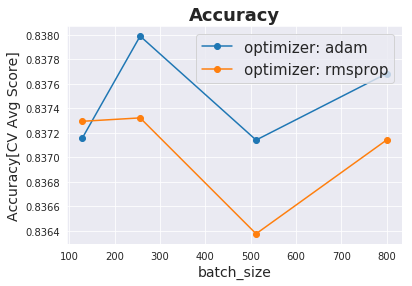

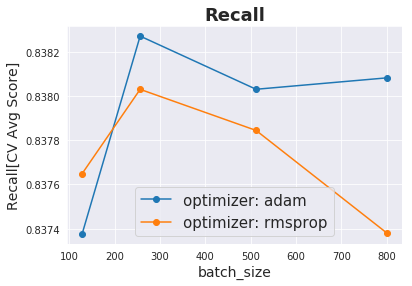

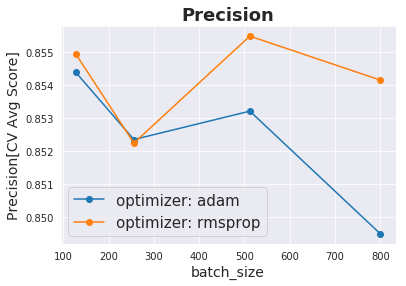

In [17]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Precision')


In [18]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list

In [19]:
index= return_index_list(params['batch_size'], params['optimizer'])

df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                    'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

writer = pd.ExcelWriter('tables_smote.xlsx')
df.to_excel(writer, 'ANN_smote')
writer.save()
writer.close()

In [20]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[128, adam]",0.837155,0.854375,0.837376,0.000139
"[128, rmsprop]",0.837294,0.854930,0.837649,0.000864
"[256, adam]",0.837991,0.852343,0.838272,0.001198
"[256, rmsprop]",0.837322,0.852236,0.838031,0.000084
"[512, adam]",0.837141,0.853203,0.838031,0.000320
"[512, rmsprop]",0.836375,0.855477,0.837845,0.000975
"[800, adam]",0.837684,0.849487,0.838083,0.000000
"[800, rmsprop]",0.837141,0.854145,0.837381,0.000683


In [21]:
## check for overfiting
model_ov= create_model("adam")
history= model_ov.fit(x=X_train, y=Y_train, epochs=300, batch_size=800, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])


Train on 71786 samples, validate on 30766 samples
Epoch 1/300
71786/71786 [==============================] - 2s 22us/sample - loss: 0.6861 - accuracy: 0.5633 - val_loss: 0.6399 - val_accuracy: 0.7288
Epoch 2/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.5966 - accuracy: 0.6955 - val_loss: 0.4995 - val_accuracy: 0.7637
Epoch 3/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.4827 - accuracy: 0.7758 - val_loss: 0.4006 - val_accuracy: 0.8299
Epoch 4/300
71786/71786 [==============================] - 1s 16us/sample - loss: 0.4278 - accuracy: 0.8143 - val_loss: 0.3834 - val_accuracy: 0.8304
Epoch 5/300
71786/71786 [==============================] - 1s 12us/sample - loss: 0.4111 - accuracy: 0.8243 - val_loss: 0.3763 - val_accuracy: 0.8309
Epoch 6/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.4004 - accuracy: 0.8283 - val_loss: 0.3731 - val_accuracy: 0.8309
Epoch 7/300
71786/71786 [===========================

71786/71786 [==============================] - 1s 13us/sample - loss: 0.3642 - accuracy: 0.8337 - val_loss: 0.3587 - val_accuracy: 0.8327
Epoch 56/300
71786/71786 [==============================] - 1s 10us/sample - loss: 0.3642 - accuracy: 0.8345 - val_loss: 0.3586 - val_accuracy: 0.8324
Epoch 57/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3637 - accuracy: 0.8350 - val_loss: 0.3584 - val_accuracy: 0.8333
Epoch 58/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3643 - accuracy: 0.8346 - val_loss: 0.3586 - val_accuracy: 0.8330
Epoch 59/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3639 - accuracy: 0.8348 - val_loss: 0.3586 - val_accuracy: 0.8324
Epoch 60/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3641 - accuracy: 0.8341 - val_loss: 0.3585 - val_accuracy: 0.8327
Epoch 61/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3638 - accuracy: 0.8346 - v

71786/71786 [==============================] - 1s 8us/sample - loss: 0.3625 - accuracy: 0.8348 - val_loss: 0.3578 - val_accuracy: 0.8331
Epoch 110/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3627 - accuracy: 0.8343 - val_loss: 0.3578 - val_accuracy: 0.8327
Epoch 111/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3630 - accuracy: 0.8342 - val_loss: 0.3579 - val_accuracy: 0.8335
Epoch 112/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3622 - accuracy: 0.8345 - val_loss: 0.3586 - val_accuracy: 0.8323
Epoch 113/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3628 - accuracy: 0.8355 - val_loss: 0.3580 - val_accuracy: 0.8331
Epoch 114/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3623 - accuracy: 0.8351 - val_loss: 0.3580 - val_accuracy: 0.8331
Epoch 115/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3626 - accuracy: 0.8349

Epoch 163/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3607 - accuracy: 0.8357 - val_loss: 0.3576 - val_accuracy: 0.8335
Epoch 164/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3603 - accuracy: 0.8356 - val_loss: 0.3571 - val_accuracy: 0.8338
Epoch 165/300
71786/71786 [==============================] - 1s 7us/sample - loss: 0.3606 - accuracy: 0.8359 - val_loss: 0.3578 - val_accuracy: 0.8331
Epoch 166/300
71786/71786 [==============================] - 1s 9us/sample - loss: 0.3607 - accuracy: 0.8346 - val_loss: 0.3573 - val_accuracy: 0.8338
Epoch 167/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3602 - accuracy: 0.8350 - val_loss: 0.3571 - val_accuracy: 0.8335
Epoch 168/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3616 - accuracy: 0.8355 - val_loss: 0.3576 - val_accuracy: 0.8327
Epoch 169/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3610 - ac

71786/71786 [==============================] - 1s 8us/sample - loss: 0.3593 - accuracy: 0.8369 - val_loss: 0.3563 - val_accuracy: 0.8336
Epoch 218/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3597 - accuracy: 0.8361 - val_loss: 0.3562 - val_accuracy: 0.8334
Epoch 219/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3590 - accuracy: 0.8363 - val_loss: 0.3561 - val_accuracy: 0.8342
Epoch 220/300
71786/71786 [==============================] - 1s 7us/sample - loss: 0.3597 - accuracy: 0.8367 - val_loss: 0.3560 - val_accuracy: 0.8345
Epoch 221/300
71786/71786 [==============================] - 1s 7us/sample - loss: 0.3588 - accuracy: 0.8360 - val_loss: 0.3561 - val_accuracy: 0.8336
Epoch 222/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3598 - accuracy: 0.8362 - val_loss: 0.3562 - val_accuracy: 0.8336
Epoch 223/300
71786/71786 [==============================] - 1s 7us/sample - loss: 0.3593 - accuracy: 0.8357

71786/71786 [==============================] - 0s 6us/sample - loss: 0.3593 - accuracy: 0.8362 - val_loss: 0.3549 - val_accuracy: 0.8345
Epoch 272/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3588 - accuracy: 0.8362 - val_loss: 0.3552 - val_accuracy: 0.8337
Epoch 273/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3589 - accuracy: 0.8359 - val_loss: 0.3555 - val_accuracy: 0.8329
Epoch 274/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3592 - accuracy: 0.8358 - val_loss: 0.3555 - val_accuracy: 0.8333
Epoch 275/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3575 - accuracy: 0.8364 - val_loss: 0.3549 - val_accuracy: 0.8340
Epoch 276/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3585 - accuracy: 0.8355 - val_loss: 0.3545 - val_accuracy: 0.8339
Epoch 277/300
71786/71786 [==============================] - 1s 8us/sample - loss: 0.3588 - accuracy: 0.8359

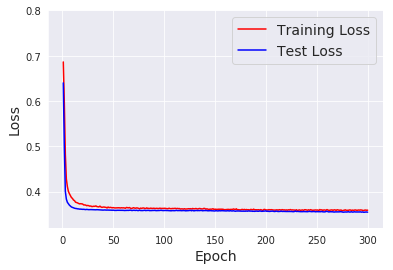

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
_, ax = plt.subplots(1,1)
ax.set_ylim([0.32,0.8])
ax.plot(epoch_count, training_loss, 'r-')
ax.plot(epoch_count, test_loss, 'b-')

ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(['Training Loss', 'Test Loss'], fontsize=14)
ax.grid('on')
